In [153]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

# Idea to generate a random SNF to compare it to others in the category.
import random

In [154]:
url="https://data.cms.gov/provider-data/api/1/metastore/schemas/dataset/items/4pq5-n9py?show-reference-ids=false"

In [155]:
print(requests.get(url))

<Response [200]>


In [156]:
print(requests.get(url).json())

{'accessLevel': 'public', 'landingPage': 'https://data.cms.gov/provider-data/dataset/4pq5-n9py', 'bureauCode': ['009:38'], 'issued': '2023-08-01', '@type': 'dcat:Dataset', 'modified': '2024-04-01', 'released': '2024-04-24', 'keyword': [{'identifier': 'd03021cc-311c-5181-8eb6-7ccf7e76fc53', 'data': 'General Information'}, {'identifier': '203355e5-2454-505d-b356-08de15938ab9', 'data': 'Address'}, {'identifier': 'c59e48c7-3cc5-5a09-adec-a49493db72f6', 'data': 'Location'}, {'identifier': '70a212e5-bf1b-5cad-9ecd-150dab2bacf9', 'data': 'Ratings'}, {'identifier': '107b8826-e90b-5db3-ac30-ecdb99c73db6', 'data': 'Beds'}, {'identifier': '5692b1a6-1c82-55c4-9698-c7441733b985', 'data': 'Quality'}, {'identifier': 'a6f7b7c6-d26e-5f59-8a5b-c151bacb9907', 'data': 'Staffing'}, {'identifier': '35df7004-e437-5a8a-a96b-1bda5456ccca', 'data': 'Penalties'}], 'contactPoint': {'@type': 'vcard:Contact', 'fn': 'Nursing homes including rehab services', 'hasEmail': 'mailto:BetterCare@cms.hhs.gov'}, 'publisher': 

In [157]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "%modified": "2024-04-12T16:05:17-0400",
    "@type": "dcat:Dataset",
    "accessLevel": "public",
    "bureauCode": [
        "009:38"
    ],
    "contactPoint": {
        "@type": "vcard:Contact",
        "fn": "Nursing homes including rehab services",
        "hasEmail": "mailto:BetterCare@cms.hhs.gov"
    },
    "description": "General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.",
    "distribution": [
        {
            "data": {
                "%Ref:downloadURL": [
                    {
                        "data": {
                            "checksum": null,
                            "filePath": "s3://pdc-s3-nhc-data/NH_ProviderInfo_Apr2024.csv",
                            "identifier": "5eba4f43478aeb4d0ab8d071e1e4655d",
                            "mimeType": "text/csv",
           

In [158]:
response = requests.get(url).json()
print(json.dumps(response["distribution"][0]["data"]["downloadURL"], indent=4, sort_keys=True))

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [159]:
nursinghomedataURL = json.dumps(response["distribution"][0]["data"]['downloadURL'], indent=4, sort_keys=True)
print(nursinghomedataURL)

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [160]:
cleaned_string = nursinghomedataURL.replace('"', ' ').strip()

In [161]:
cleaned_string

'https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv'

In [162]:
# Define the full path to your Resources folder and the desired filename
path = Path("Resources")
filename = "NH_ProviderInfo_Apr2024.csv"

# Combine the path to the Resources folder with the desired filename
file_path = path / filename

# Ensure the directory exists (since it already should), but this will prevent errors
path.mkdir(parents=True, exist_ok=True)

# Download the file
response = requests.get(cleaned_string)
response.raise_for_status()  # Ensure that the download was successful

# Save the file
with open(file_path, 'wb') as file:
    file.write(response.content)

# Print the full file path where the file is saved
print(f"File successfully saved at {file_path}")

File successfully saved at Resources\NH_ProviderInfo_Apr2024.csv


In [206]:
# pd.read_csv(nursinghomedataURL).sample(5)
nursinghomedata=pd.read_csv(cleaned_string)
nursinghomedata.sample(5)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
11662,435042,AVERA MOTHER JOSEPH MANOR RETIREMENT COMMUNITY,1002 NORTH JAY STREET,ABERDEEN,SD,57401,6056225850,60,Brown,Non profit - Corporation,...,0.0,1,11787.75,0,1,"1002 NORTH JAY STREET,ABERDEEN,SD,57401",45.4758,-98.484,NaN,2024-04-01
10320,375166,THE OAKS HEALTHCARE CENTER,1501 CLAYTON AVENUE,POTEAU,OK,74953,9186478236,390,Le Flore,For profit - Limited Liability company,...,0.0,3,6656.83,0,3,"1501 CLAYTON AVENUE,POTEAU,OK,74953",35.0457,-94.612,NaN,2024-04-01
7039,265309,JOPLIN HEALTH AND REHABILITATION CENTER,2218 W 32ND STREET,JOPLIN,MO,64804,4176235264,720,Newton,For profit - Corporation,...,0.0,0,0.00,0,0,"2218 W 32ND STREET,JOPLIN,MO,64804",37.0554,-94.541,NaN,2024-04-01
6169,235373,HEARTWOOD LODGE TRINITY HEALTH,18525 WOODLAND RIDGE DRIVE,SPRING LAKE,MI,49456,6168420770,690,Ottawa,Non profit - Church related,...,NaN,1,650.00,1,2,"18525 WOODLAND RIDGE DRIVE,SPRING LAKE,MI,49456",43.0934,-86.239,NaN,2024-04-01
389,045125,BUTTERFIELD TRAIL VILLAGE,1923 EAST JOYCE BLVD,FAYETTEVILLE,AR,72703,4796958065,710,Washington,Non profit - Corporation,...,1.0,2,1625.00,0,2,"1923 EAST JOYCE BLVD,FAYETTEVILLE,AR,72703",36.1201,-94.134,NaN,2024-04-01


In [209]:
# Drop columns that are not needed
nursinghomedataREDUCED=nursinghomedata.drop(columns=['Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating',
                                                    'Short-Stay QM Rating',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating Footnote',
                                                    'Number of administrators who have left the nursing home',
                                                    'Average Number of Residents per Day Footnote',
                                                    'Provider Type',
                                                    'Number of Citations from Infection Control Inspections',
                                                    'Provider Resides in Hospital',
                                                    'Special Focus Status',
                                                    'Automatic Sprinkler Systems in All Required Areas',
                                                    'Overall Rating Footnote',
                                                    'Health Inspection Rating Footnote',
                                                    'QM Rating Footnote',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Geocoding Footnote',
                                                    'Processing Date',
                                                    'Provider SSA County Code',
                                                    'Staffing Rating Footnote',
                                                    'Reported Staffing Footnote',
                                                    'Physical Therapist Staffing Footnote',
                                                    'Total nursing staff turnover footnote',
                                                    'Registered Nurse turnover footnote',
                                                    'Administrator turnover footnote',
                                                    'Telephone Number',
                                                    'ZIP Code',
                                                    'County/Parish',
                                                    'Legal Business Name',
                                                    'Continuing Care Retirement Community',
                                                    'Abuse Icon',
                                                    'Affiliated Entity Name', 
                                                    'Affiliated Entity ID',
                                                    'Provider Changed Ownership in Last 12 Months',
                                                    'Most Recent Health Inspection More Than 2 Years Ago',
                                                    'Provider Resides in Hospital',
                                                    'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
                                                    'Case-Mix LPN Staffing Hours per Resident per Day',
                                                    'Case-Mix RN Staffing Hours per Resident per Day',
                                                    'Case-Mix Total Nurse Staffing Hours per Resident per Day',
                                                    'Provider Address',
                                                    'City/Town',
                                                    'Date First Approved to Provide Medicare and Medicaid Services',
                                                    'Provider Name',
                                                    'With a Resident and Family Council',
                                             ])   

# nursinghomedataREDUCED.sample(25)

In [210]:
# nursinghomedataREDUCED.columns

In [201]:
# Getting Specific Data Columns for XX State
HawaiiData = nursinghomedataREDUCED.loc[nursinghomedata['State'] == ("HI")]
HawaiiData

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
2777,125002,HI,Government - State,40,44.9,5.0,4.0,5.0,5.0,2.91255,...,44.667,1,0,2,23782.50,0,2,"1190 WAIANUENUE AVENUE,HILO,HI,96720",19.7175,-155.113
2778,125003,HI,Non profit - Corporation,105,94.8,4.0,3.0,5.0,4.0,3.29870,...,54.000,1,4,0,0.00,0,0,"100 KEOKEA PLACE,KULA,HI,96790",20.7018,-156.357
2779,125004,HI,For profit - Limited Liability company,110,69.0,4.0,3.0,4.0,5.0,1.99803,...,61.333,4,2,0,0.00,0,0,"3-3420 KUHIO HIGHWAY, SUITE 300,LIHUE,HI,96766",21.9789,-159.367
2780,125007,HI,Non profit - Corporation,252,214.5,2.0,1.0,5.0,5.0,2.56239,...,220.833,8,7,5,233142.14,0,5,"472 KAULANA STREET,KAHULUI,HI,96732",20.8792,-156.476
2781,125009,HI,Government - State,158,75.8,5.0,5.0,4.0,4.0,2.53511,...,38.667,0,0,0,0.00,0,0,"1027 HALA DRIVE,HONOLULU,HI,96817",21.3297,-157.861
2782,125010,HI,Government - State,155,103.9,5.0,3.0,5.0,5.0,2.28286,...,67.333,1,3,1,55900.00,0,1,"3675 KILAUEA AVENUE,HONOLULU,HI,96816",21.2736,-157.801
2783,125011,HI,For profit - Limited Liability company,288,268.9,4.0,3.0,5.0,3.0,3.07637,...,92.667,2,3,1,11537.50,0,1,"1677 PENSACOLA STREET,HONOLULU,HI,96822",21.3086,-157.840
2784,125013,HI,Non profit - Other,100,86.3,5.0,5.0,5.0,5.0,3.02700,...,38.667,0,0,0,0.00,0,0,"5113 MAUNALANI CIRCLE,HONOLULU,HI,96816",21.2979,-157.788
2785,125014,HI,Non profit - Corporation,91,74.6,5.0,3.0,5.0,5.0,2.99464,...,88.333,1,0,2,33663.50,0,2,"1434 PUNAHOU STREET,HONOLULU,HI,96822",21.3015,-157.833
2786,125019,HI,For profit - Corporation,182,173.0,2.0,2.0,4.0,2.0,2.58181,...,110.333,0,16,4,35188.44,2,6,"1900 BACHELOT STREET,HONOLULU,HI,96817",21.3234,-157.855


In [213]:
# Removing off states, like Guam
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedataREDUCED[~nursinghomedataREDUCED['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

In [214]:
sortedNHD= statetrimedNHD.groupby("State")
sortedNHD.head()

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
0,015009,AL,For profit - Corporation,57,51.2,2.0,2.0,4.0,3.0,2.54923,...,31.333,2,0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736
1,015010,AL,For profit - Corporation,85,80.4,4.0,4.0,3.0,3.0,2.59139,...,6.667,0,0,0,0.00,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254
2,015012,AL,Government - County,50,40.5,4.0,4.0,2.0,4.0,3.50215,...,13.333,0,0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047
3,015014,AL,For profit - Individual,92,75.9,3.0,3.0,4.0,2.0,1.85428,...,20.667,0,0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722
4,015015,AL,For profit - Individual,103,85.5,2.0,2.0,3.0,4.0,2.21479,...,26.667,0,1,1,975.00,0,1,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,535013,WY,For profit - Limited Liability company,146,87.6,1.0,2.0,3.0,1.0,1.67909,...,55.333,0,11,4,26048.75,0,4,"3128 BOXELDER DRIVE,CHEYENNE,WY,82001",41.1391,-104.777
13353,535017,WY,Non profit - Corporation,50,36.9,5.0,4.0,5.0,4.0,2.23379,...,22.667,2,0,2,4565.60,0,2,"333 N BRIDGER AVE,PINEDALE,WY,82941",42.8697,-109.857
13354,535021,WY,Government - State,90,81.3,3.0,3.0,2.0,4.0,2.65335,...,27.333,1,0,1,7442.50,0,1,"890 US HWY 20 SOUTH,BASIN,WY,82410",44.3602,-108.039
13355,535022,WY,Government - Hospital district,160,105.8,2.0,2.0,3.0,4.0,2.93497,...,44.000,0,10,0,0.00,0,0,"1000 S DOUGLAS HWY,GILLETTE,WY,82716",44.2834,-105.494


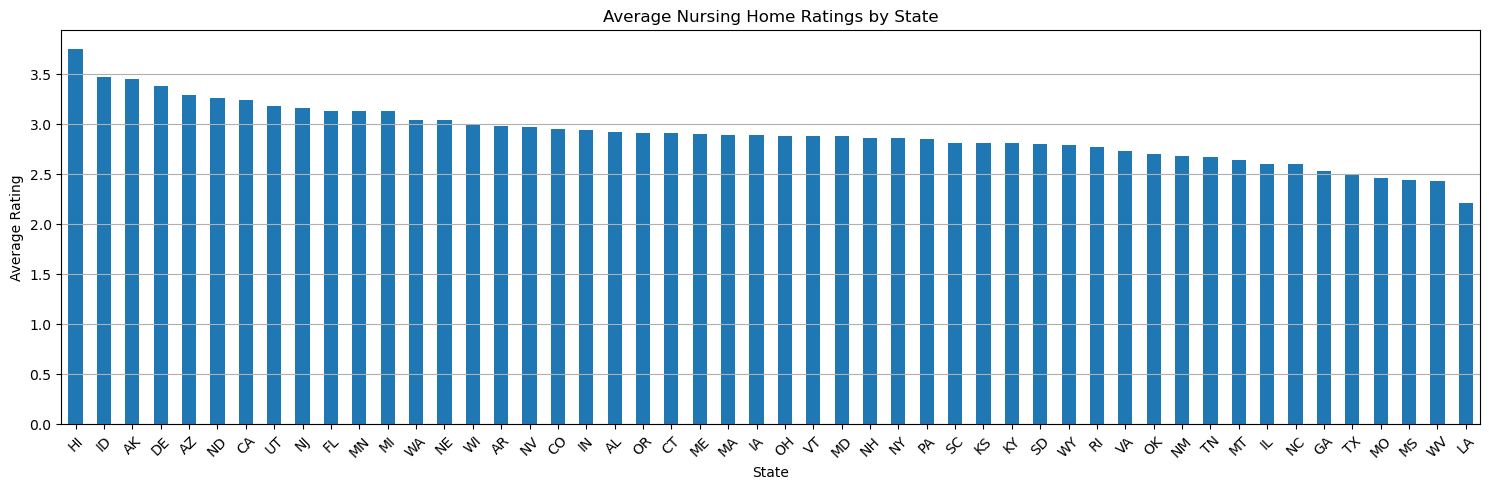

Bar chart successfully saved to Images\State_Ratings_Mean.png


In [215]:

# Define the path for saving the image
images_folder = Path("Images")
images_folder.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
save_path = images_folder / "State_Ratings_Mean.png"

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data on the axes object
state_ratings_mean.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Average Rating')
ax.set_title('Average Nursing Home Ratings by State')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the figure using the fig object directly
fig.savefig(save_path)

# Display the plot
plt.show()

print(f"Bar chart successfully saved to {save_path}")